**INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY**

**CAMPUS PUEBLA**

**ANALITICA DE DATOS Y HERRAMIENTAS DE INTELIGENCIA ARTIFICIAL II**

**GRUPO: 501**

**Sebastian Contreras Hernández**

**MATRICULA: A01735880**

**PROFESOR:**

**Alfredo García Suárez**

**FECHA: 25/09/2024**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carga desde un archivo .csv desde equipo
data = pd.read_csv('Mexico_sin_nulos.csv')
data.head(5)

,Unnamed: 0,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,...,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_clean,bathroom_text_num,amenities_num,host_verifications_num,priceMexCategory
0,0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,...,0.41,11.0,0,4,3,bath,3,56,2,Muy Económico
1,1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,...,1.13,14.0,0,3,0,bath,3,12,3,Muy Económico
2,2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,...,0.42,14.0,0,4,3,bath,3,26,3,Muy Económico
3,3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,...,1.19,11.0,0,9,3,bath,3,36,2,Muy Económico
4,4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,...,0.32,13.0,0,4,1,bath,3,21,2,Muy Económico


In [3]:
data = data.drop('Unnamed: 0', axis=1)

In [4]:
#Verificamos información
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    26536 non-null  object 
 1   source                          26536 non-null  object 
 2   host_name                       26536 non-null  object 
 3   host_response_time              26536 non-null  object 
 4   host_verifications              26536 non-null  object 
 5   neighbourhood_cleansed          26536 non-null  object 
 6   property_type                   26536 non-null  object 
 7   room_type                       26536 non-null  object 
 8   bathrooms_text                  26536 non-null  object 
 9   amenities                       26536 non-null  object 
 10  calendar_last_scraped           26536 non-null  object 
 11  host_id                         26536 non-null  int64  
 12  host_since                      

In [5]:
#Creamos 2 dataframes para poder procesar los outliers
cuantitativas= data.select_dtypes(include=[int, np.float64])
cualitativas= data.select_dtypes(include=[object])

<Figure size 1500x800 with 0 Axes>

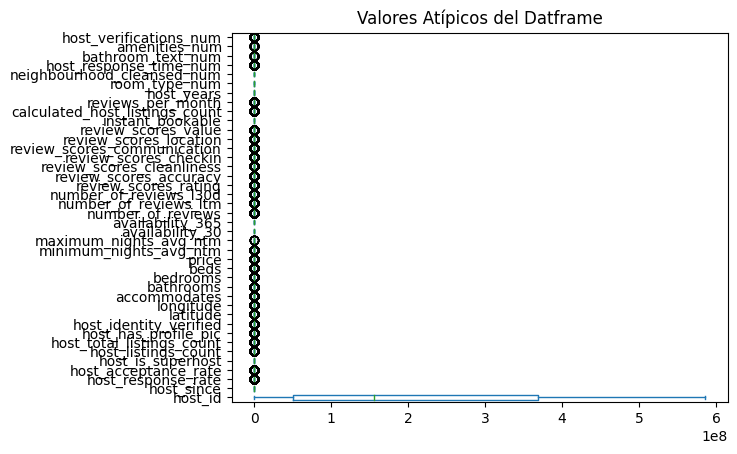

In [6]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize = (15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Datframe")
plt.show() #Dibujamos el diagrama

## PROCEDIMIENTO DESVIACIÓN ESTANDAR PARA ELIMINAR OUTLIERS

In [7]:
#Encuentro los valores extremos
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Límite superior permitido", Limite_Superior)
print("Límite inferior permitido", Limite_Inferior)

Límite superior permitido host_id                           7.540126e+08
host_since                        2.027446e+03
host_response_rate                1.452281e+02
host_acceptance_rate              1.555618e+02
host_is_superhost                 2.311784e+00
host_listings_count               2.761162e+02
host_total_listings_count         4.885766e+02
host_has_profile_pic              1.380620e+00
host_identity_verified            1.547104e+00
latitude                          1.953258e+01
longitude                        -9.906656e+01
accommodates                      1.036711e+01
bathrooms                         4.398016e+00
bedrooms                          5.301069e+00
beds                              6.769485e+00
price                             1.316520e+04
minimum_nights_avg_ntm            7.475091e+01
maximum_nights_avg_ntm            2.168602e+03
availability_30                   5.061659e+01
availability_365                  5.982199e+02
number_of_reviews                 

In [8]:
#Verificamos outliers
data2=cuantitativas[(y>Limite_Superior)|(y<Limite_Inferior)]
data2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,instant_bookable,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,instant_bookable,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num
0,4796027,2013,100.0,88.0,1.0,3.0,6.0,1.0,1.0,19.420630,...,0,3.0,0.41,11.0,0,4,3.0,3.0,56.0,2.0
1,153786,2010,NaN,89.8,0.0,1.0,1.0,1.0,1.0,19.382830,...,0,1.0,1.13,14.0,0,3,NaN,3.0,12.0,3.0
2,196253,2010,100.0,92.0,1.0,17.0,17.0,1.0,1.0,19.411620,...,0,13.0,0.42,14.0,0,4,3.0,3.0,26.0,3.0
3,4647293,2013,100.0,96.0,1.0,1.0,4.0,1.0,1.0,19.439560,...,1,1.0,1.19,11.0,0,9,3.0,3.0,36.0,2.0
4,334451,2011,89.0,62.0,1.0,3.0,4.0,1.0,1.0,19.411520,...,0,2.0,0.32,13.0,0,4,1.0,3.0,21.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,19255745,2014,100.0,100.0,1.0,13.0,15.0,1.0,1.0,19.404546,...,1,8.0,1.13,10.0,0,4,3.0,3.0,31.0,2.0
26532,7681206,2013,97.0,91.0,0.0,33.0,51.0,1.0,1.0,19.420567,...,0,11.0,1.13,11.0,0,4,3.0,3.0,48.0,2.0
26533,50951150,2015,100.0,100.0,2.0,12.0,15.0,1.0,1.0,19.408648,...,0,1.0,1.13,9.0,0,4,3.0,3.0,39.0,3.0
26534,147254250,2017,100.0,100.0,1.0,3.0,3.0,1.0,1.0,19.412367,...,0,3.0,1.13,7.0,0,4,3.0,3.0,10.0,2.0


In [10]:
#Corroboramos valores nulos del Datframe4
valores_nulos=data3.isnull().sum()
valores_nulos

,0
host_id,0
host_since,0
host_response_rate,821
host_acceptance_rate,1102
host_is_superhost,0
host_listings_count,791
host_total_listings_count,415
host_has_profile_pic,477
host_identity_verified,1058
latitude,359


In [11]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del DataFrame
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,instant_bookable,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num
0,4796027,2013,100.0,88.0,1.0,3.0,6.0,1.0,1.0,19.420630,...,0,3.0,0.41,11.0,0,4,3.0,3.0,56.0,2.0
1,153786,2010,97.1,89.8,0.0,1.0,1.0,1.0,1.0,19.382830,...,0,1.0,1.13,14.0,0,3,2.8,3.0,12.0,3.0
2,196253,2010,100.0,92.0,1.0,17.0,17.0,1.0,1.0,19.411620,...,0,13.0,0.42,14.0,0,4,3.0,3.0,26.0,3.0
3,4647293,2013,100.0,96.0,1.0,1.0,4.0,1.0,1.0,19.439560,...,1,1.0,1.19,11.0,0,9,3.0,3.0,36.0,2.0
4,334451,2011,89.0,62.0,1.0,3.0,4.0,1.0,1.0,19.411520,...,0,2.0,0.32,13.0,0,4,1.0,3.0,21.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,19255745,2014,100.0,100.0,1.0,13.0,15.0,1.0,1.0,19.404546,...,1,8.0,1.13,10.0,0,4,3.0,3.0,31.0,2.0
26532,7681206,2013,97.0,91.0,0.0,33.0,51.0,1.0,1.0,19.420567,...,0,11.0,1.13,11.0,0,4,3.0,3.0,48.0,2.0
26533,50951150,2015,100.0,100.0,2.0,12.0,15.0,1.0,1.0,19.408648,...,0,1.0,1.13,9.0,0,4,3.0,3.0,39.0,3.0
26534,147254250,2017,100.0,100.0,1.0,3.0,3.0,1.0,1.0,19.412367,...,0,3.0,1.13,7.0,0,4,3.0,3.0,10.0,2.0


In [12]:
#Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios_desvest = pd.concat([cualitativas, data_clean], axis=1)
Datos_limpios_desvest

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,instant_bookable,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,0,3.0,0.41,11.0,0,4,3.0,3.0,56.0,2.0
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,0,1.0,1.13,14.0,0,3,2.8,3.0,12.0,3.0
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,0,13.0,0.42,14.0,0,4,3.0,3.0,26.0,3.0
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,1,1.0,1.19,11.0,0,9,3.0,3.0,36.0,2.0
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,0,2.0,0.32,13.0,0,4,1.0,3.0,21.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,2024-06-28,city scrape,Elvy,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,4.5 baths,"[""Wifi"", ""Smoke alarm"", ""Essentials"", ""Room-da...",...,1,8.0,1.13,10.0,0,4,3.0,3.0,31.0,2.0
26532,2024-06-28,city scrape,Nicolas,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Outdoor furniture"", ""Portable fans"",...",...,0,11.0,1.13,11.0,0,4,3.0,3.0,48.0,2.0
26533,2024-06-28,city scrape,Sandra,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Smoke alarm"", ""Wine glasses"", ""Essen...",...,0,1.0,1.13,9.0,0,4,3.0,3.0,39.0,3.0
26534,2024-06-28,city scrape,Salomon,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,1.5 baths,"[""Washer"", ""Wifi"", ""Exterior security cameras ...",...,0,3.0,1.13,7.0,0,4,3.0,3.0,10.0,2.0


In [13]:
#Convertir DataFrame a CSV
Datos_limpios_desvest.to_csv("Datos_limpios_desv_Mexico.csv")

In [14]:
#descargar archivo filtrado en csv
from google.colab import files


files.download("Datos_limpios_desv_Mexico.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Procedimiento CUANTILES para sustituir Outliers en DtaFrame

In [15]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_id                           8.456103e+08
host_since                        2.027500e+03
host_response_rate                1.085500e+02
host_acceptance_rate              1.153000e+02
host_is_superhost                 2.500000e+00
host_listings_count               3.350000e+01
host_total_listings_count         3.950000e+01
host_has_profile_pic              1.000000e+00
host_identity_verified            1.000000e+00
latitude                          1.949363e+01
longitude                        -9.911756e+01
accommodates                      7.000000e+00
bathrooms                         3.500000e+00
bedrooms                          3.500000e+00
beds                              3.500000e+00
price                             2.645500e+03
minimum_nights_avg_ntm            4.500000e+00
maximum_nights_avg_ntm            2.265000e+03
availability_30                   6.450000e+01
availability_365                  6.885000e+02
number_of_reviews                 

In [16]:
#Obtenemos datos limpios del DataFrame
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,instant_bookable,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num
0,4796027,2013,100.0,88.0,1.0,3.0,6.0,1.0,1.0,19.420630,...,0,3.0,0.41,11.0,0,4,3.0,3.0,56.0,2.0
1,153786,2010,NaN,89.8,0.0,1.0,1.0,1.0,1.0,19.382830,...,0,1.0,1.13,14.0,0,3,NaN,3.0,12.0,NaN
2,196253,2010,100.0,92.0,1.0,17.0,17.0,1.0,1.0,19.411620,...,0,13.0,0.42,14.0,0,4,3.0,3.0,26.0,NaN
3,4647293,2013,100.0,96.0,1.0,1.0,4.0,1.0,1.0,19.439560,...,1,1.0,1.19,11.0,0,9,3.0,3.0,36.0,2.0
4,334451,2011,89.0,NaN,1.0,3.0,4.0,1.0,1.0,19.411520,...,0,2.0,0.32,13.0,0,4,NaN,3.0,21.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,19255745,2014,100.0,100.0,1.0,13.0,15.0,1.0,1.0,19.404546,...,1,8.0,1.13,10.0,0,4,3.0,3.0,31.0,2.0
26532,7681206,2013,97.0,91.0,0.0,33.0,NaN,1.0,1.0,19.420567,...,0,11.0,1.13,11.0,0,4,3.0,3.0,48.0,2.0
26533,50951150,2015,100.0,100.0,2.0,12.0,15.0,1.0,1.0,19.408648,...,0,1.0,1.13,9.0,0,4,3.0,3.0,39.0,NaN
26534,147254250,2017,100.0,100.0,1.0,3.0,3.0,1.0,1.0,19.412367,...,0,3.0,1.13,7.0,0,4,3.0,3.0,10.0,2.0


In [17]:
#Corroboramos valores nulos del Datframe Limpio
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

,0
host_id,0
host_since,0
host_response_rate,1936
host_acceptance_rate,2853
host_is_superhost,0
host_listings_count,3537
host_total_listings_count,3824
host_has_profile_pic,477
host_identity_verified,1058
latitude,1773


In [18]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del DataFrame
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,instant_bookable,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num
0,4796027,2013,100.0,88.0,1.0,3.0,6.0,1.0,1.0,19.420630,...,0,3.0,0.41,11.0,0,4,3.0,3.0,56.0,2.0
1,153786,2010,98.3,89.8,0.0,1.0,1.0,1.0,1.0,19.382830,...,0,1.0,1.13,14.0,0,3,3.0,3.0,12.0,2.0
2,196253,2010,100.0,92.0,1.0,17.0,17.0,1.0,1.0,19.411620,...,0,13.0,0.42,14.0,0,4,3.0,3.0,26.0,2.0
3,4647293,2013,100.0,96.0,1.0,1.0,4.0,1.0,1.0,19.439560,...,1,1.0,1.19,11.0,0,9,3.0,3.0,36.0,2.0
4,334451,2011,89.0,96.5,1.0,3.0,4.0,1.0,1.0,19.411520,...,0,2.0,0.32,13.0,0,4,3.0,3.0,21.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,19255745,2014,100.0,100.0,1.0,13.0,15.0,1.0,1.0,19.404546,...,1,8.0,1.13,10.0,0,4,3.0,3.0,31.0,2.0
26532,7681206,2013,97.0,91.0,0.0,33.0,7.1,1.0,1.0,19.420567,...,0,11.0,1.13,11.0,0,4,3.0,3.0,48.0,2.0
26533,50951150,2015,100.0,100.0,2.0,12.0,15.0,1.0,1.0,19.408648,...,0,1.0,1.13,9.0,0,4,3.0,3.0,39.0,2.0
26534,147254250,2017,100.0,100.0,1.0,3.0,3.0,1.0,1.0,19.412367,...,0,3.0,1.13,7.0,0,4,3.0,3.0,10.0,2.0


In [19]:
#Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,instant_bookable,calculated_host_listings_count,reviews_per_month,host_years,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,amenities_num,host_verifications_num
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,0,3.0,0.41,11.0,0,4,3.0,3.0,56.0,2.0
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,0,1.0,1.13,14.0,0,3,3.0,3.0,12.0,2.0
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,0,13.0,0.42,14.0,0,4,3.0,3.0,26.0,2.0
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,1,1.0,1.19,11.0,0,9,3.0,3.0,36.0,2.0
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,0,2.0,0.32,13.0,0,4,3.0,3.0,21.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,2024-06-28,city scrape,Elvy,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,4.5 baths,"[""Wifi"", ""Smoke alarm"", ""Essentials"", ""Room-da...",...,1,8.0,1.13,10.0,0,4,3.0,3.0,31.0,2.0
26532,2024-06-28,city scrape,Nicolas,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Outdoor furniture"", ""Portable fans"",...",...,0,11.0,1.13,11.0,0,4,3.0,3.0,48.0,2.0
26533,2024-06-28,city scrape,Sandra,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Smoke alarm"", ""Wine glasses"", ""Essen...",...,0,1.0,1.13,9.0,0,4,3.0,3.0,39.0,2.0
26534,2024-06-28,city scrape,Salomon,within an hour,"['email', 'phone']",Cuauhtémoc,Entire home,Entire home/apt,1.5 baths,"[""Washer"", ""Wifi"", ""Exterior security cameras ...",...,0,3.0,1.13,7.0,0,4,3.0,3.0,10.0,2.0


In [20]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("Datos_limpios_iqr_Mexico.csv")

In [21]:
#descargar archivo filtrado en csv
from google.colab import files


files.download("Datos_limpios_iqr_Mexico.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>